<a href="https://colab.research.google.com/github/Williansilva2207/C-lculo-de-M-trica-e-Avalia-o-de-Desempenho/blob/main/C%C3%A1lculos_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8923 - loss: 0.3419 - val_accuracy: 0.9843 - val_loss: 0.0481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9851 - loss: 0.0462 - val_accuracy: 0.9910 - val_loss: 0.0314
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9906 - val_loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9918 - loss: 0.0242 - val_accuracy: 0.9901 - val_loss: 0.0342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9913 - val_loss: 0.0293
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


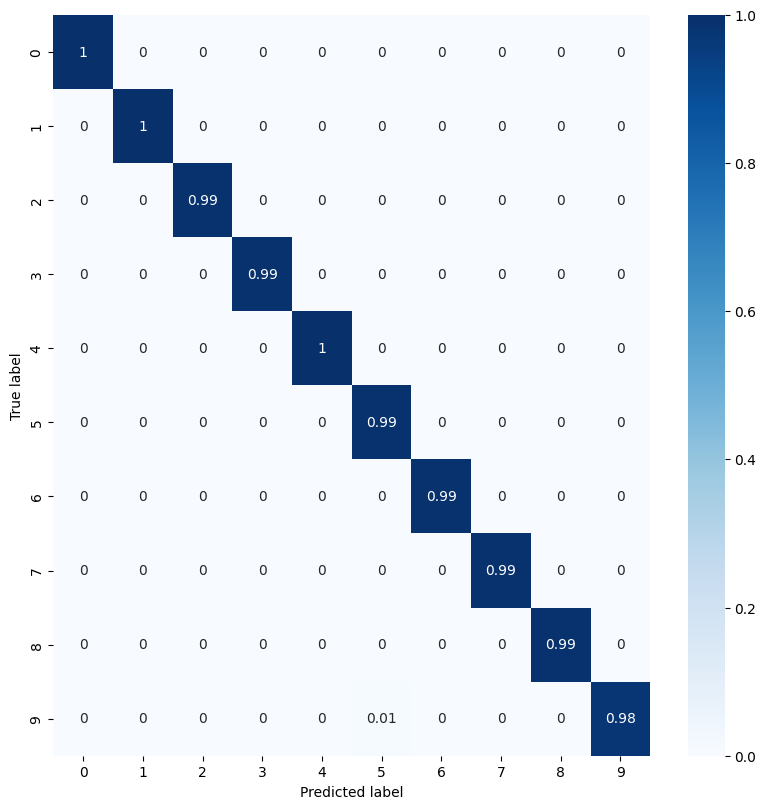

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import TensorBoard, LambdaCallback
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import io


(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0

classes = list(range(10))


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x=train_images, y=train_labels, epochs=5, validation_data=(test_images, test_labels))

y_true = test_labels
y_pred_probs = model.predict(test_images)
y_pred = np.argmax(y_pred_probs, axis=1)


con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)


plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [30]:
def sum_True_Positive(myClasse):
  sum = 0
  for a in range(len(myClasse)):
    sum += con_mat_df.loc[a, a]
  return sum

def sum_False_Negative(a,myClasse):
  calculo = sum(con_mat_df.loc[a].values) - con_mat_df.loc[a, a]
  return calculo

def sum_True_Negative(a,myClasse):
  calculo = sum_All_Itens(myClasse) - (sum_False_Negative(a,myClasse) + sum_False_Positive(a,myClasse))
  return calculo

def sum_False_Positive(a,myClasse):
  calculo = sum(con_mat_df[a].values) - con_mat_df.loc[a, a]
  return calculo

def sum_All_Itens(myClasse):
  soma = 0.0
  for a in range(len(myClasse)):
    soma += sum(con_mat_df.loc[a].values)
  return soma

def accuracy(myClasse):
  return float(sum_True_Positive(myClasse)/sum_All_Itens(myClasse))

def recall(a,myClasse):
  calculo = con_mat_df.loc[a, a]/sum(con_mat_df.loc[a].values)
  return float(calculo)

def calculando_Recall(myClasse):
  sensibility = []
  for a in range(len(myClasse)):
    sensibility.append(recall(a,myClasse))
  return sensibility

def precision(a,myClasse):
  calculo = con_mat_df.loc[a, a]/sum(con_mat_df[a].values)
  return float(calculo)


def calculando_Precision(myClasse):
  prec = []
  for a in range(len(myClasse)):
    prec.append(precision(a,myClasse))
  return prec


def especificity(a,myClasse):
  calculo = sum_True_Negative(a,myClasse)/(sum_True_Negative(a,myClasse)+sum_False_Positive(a,myClasse))
  return float(calculo)

def calculando_Especificity(myClasse):
  esp = []
  for a in range(len(myClasse)):
    esp.append(especificity(a,myClasse))
  return esp

def F1_Score(a,myClasse):
  calculando = 2*((precision(a,myClasse)*recall(a,myClasse))/(precision(a,myClasse)+recall(a,myClasse)))
  return calculando

def calculando_F1_Score(myClasse):
  f1 = []
  for a in range(len(myClasse)):
    f1.append(F1_Score(a,myClasse))
  return f1


In [31]:
print(f"Acurácia: {accuracy(classes):.4f}")
print(f"Recall: {calculando_Recall(classes)}")
print(f"Precision: {calculando_Precision(classes)}")
print(f"Especificity: {calculando_Especificity(classes)}")
print(f"F1 Score: {calculando_F1_Score(classes)}")

Acurácia: 0.9990
Recall: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899]
Precision: [1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0]
Especificity: [1.0, 1.0, 1.0, 1.0, 1.0, 0.998992950654582, 1.0, 1.0, 1.0, 1.0]
F1 Score: [1.0, 1.0, 1.0, 1.0, 1.0, 0.9949748743718593, 1.0, 1.0, 1.0, 0.9949238578680203]


Referências:

[Artigo: Accuracy, precision, and recall in multi-class classification](https://www.evidentlyai.com/classification-metrics/multi-class-metrics)

[Projeto: Confusion Matrix](https://colab.research.google.com/drive/1S9ThhinDflxU4KmTdxcv6_mE_vWwk2Jk) (esse projeto sofreu algumas modificações para se adequar as versões mais recentes)

